# **Boston Housing Prices — Linear Regression Project**
---

### Introduction

The **Boston Housing dataset** is a classic dataset in machine learning and statistics. It contains information collected by the U.S. Census Service about housing in the Boston area. The dataset has **506 rows** and **14 columns**, where each row represents a neighborhood and includes details like crime rate, number of rooms, and property tax rate.

Our **goal** in this project is to build a **Linear Regression model** that predicts the **median house price (`MEDV`)** of a Boston neighborhood based on these features.

We will approach this problem in two ways:

1. **From Scratch** → Implement Linear Regression using **Gradient Descent**.
2. **Using Scikit-Learn** → Compare results with the built-in `LinearRegression` model.

By the end, we will:

* Explore the dataset and understand which features influence housing prices.
* Train and evaluate our models.
* Compare manual implementation with scikit-learn’s results.

This project helps us understand not only how to apply Linear Regression but also the **mathematics behind it**, making our learning more solid.

---

### Importing Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading

In [2]:
data = pd.read_csv("Housing.csv")
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Dataset Overview

In [3]:
print("Shape of dataset:", data.shape)

print("\nInfo:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values per Column:")
print(data.isnull().sum())

Shape of dataset: (506, 14)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.6

### Exploratory Data Analysis (EDA)
Before training, let’s visualize relationships between features and the target (MEDV).

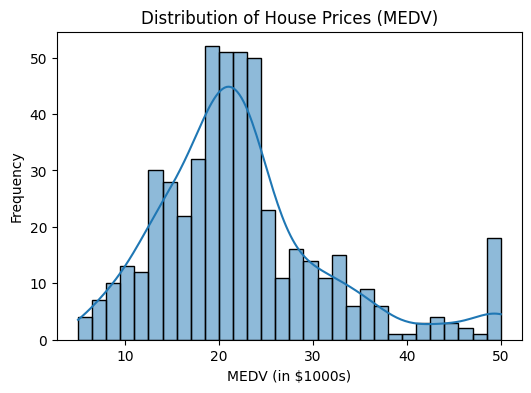

In [4]:
# Distribution of target variable 
plt.figure(figsize=(6,4))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title("Distribution of House Prices (MEDV)")
plt.xlabel("MEDV (in $1000s)")
plt.ylabel("Frequency")
plt.show()

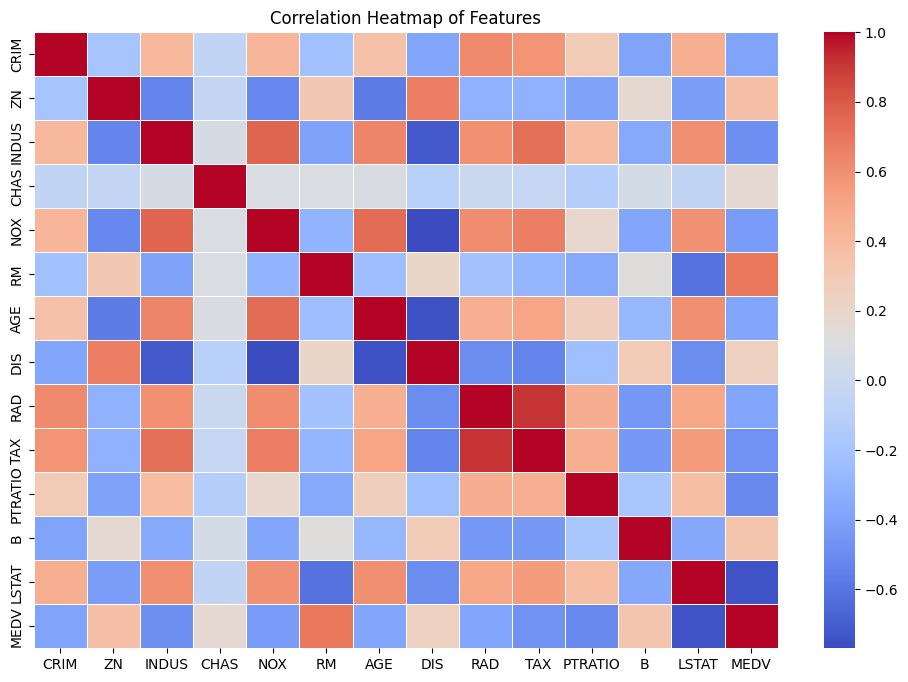

In [5]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

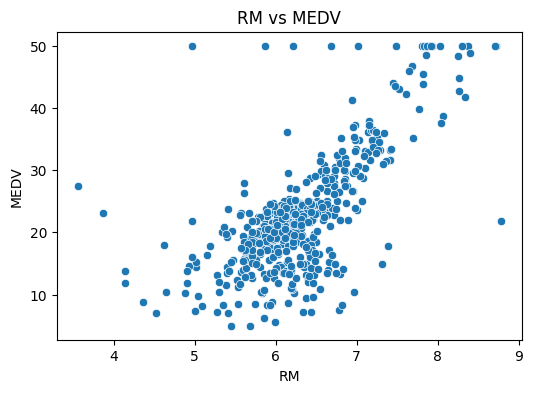

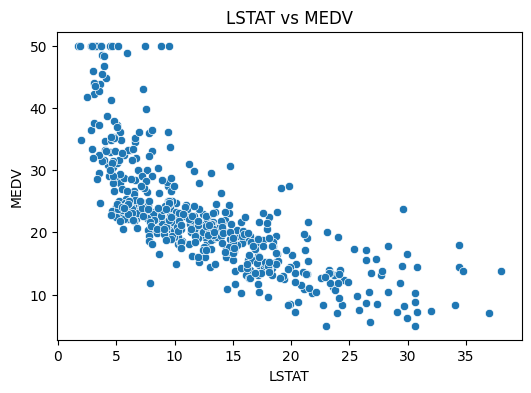

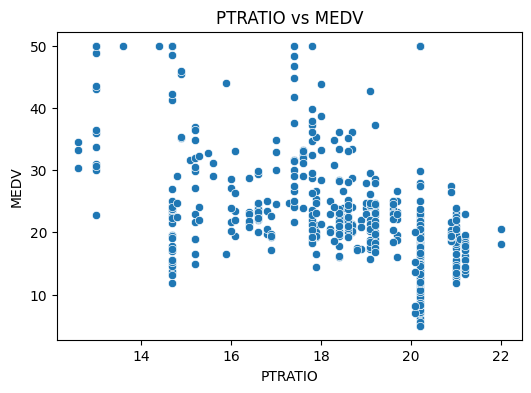

In [6]:
# Scatter plots for most important features vs MEDV
important_features = ["RM", "LSTAT", "PTRATIO"]
for feature in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[feature], y=data["MEDV"])
    plt.title(f"{feature} vs MEDV")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.show()

### Key Insights from EDA

- 📊 **Correlation Heatmap**  
  - `RM` (average number of rooms per dwelling) shows a **strong positive correlation** with `MEDV` (house prices).  
  - `LSTAT` (% lower status of the population) shows a **strong negative correlation** with `MEDV`.  

- 📈 **Distribution of Prices (`MEDV`)**  
  - The distribution is **not perfectly normal**.  
  - It is **right-skewed** and capped at **50**, which indicates potential outliers or an artificial limit in the dataset.  

- 🔎 **Scatterplots**  
  - `RM vs. MEDV`: Clear **upward trend** — more rooms are associated with higher prices.  
  - `LSTAT vs. MEDV`: Clear **downward trend** — higher % of lower status correlates with lower prices.  



### Data Preprocessing

In [7]:
# Features and target
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

##  **Linear Regression from Scratch (Gradient Descent)**

We will implement linear regression manually using **gradient descent**.  
The key steps are:


### 1. Hypothesis function  
$$
\hat{y} = Xw + b
$$  

Where:  
- **X** → features (matrix)  
- **w** → weights (vector of coefficients)  
- **b** → bias (intercept) 

In [8]:
def f_wb(x, w, b):
    return np.dot(x, w) + b

### 2. Cost function (MSE)  
$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2
$$  

- Measures error between predictions and actual values.  
- Dividing by `2m` makes gradients simpler.  


In [9]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    cost_sum = 0
    for i in range(m):
        cost = (f_wb(X[i], w, b) - y[i]) ** 2
        cost_sum += cost
        
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost



### 3. Gradients (Partial Derivatives)

**Gradient w\.r.t. bias $b$:**

$$
\frac{\partial J(w,b)}{\partial b}^{(i)} = f_{w,b}(x^{(i)}) - y^{(i)}
$$

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$


**Gradient w\.r.t. each weight $w_j$:**

$$
\frac{\partial J(w,b)}{\partial w_j}^{(i)} = \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) \cdot x^{(i)}_j
$$

$$
\frac{\partial J(w,b)}{\partial w_j} = \frac{1}{m} \sum_{i=0}^{m-1} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big) \cdot x^{(i)}_j
$$


**Vectorized form:**

$$
\nabla_w J(w,b) = \frac{1}{m} X^\top \Big( (Xw + b\mathbf{1}) - y \Big)
$$

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \big( f_{w,b}(x^{(i)}) - y^{(i)} \big)
$$



In [10]:
def compute_gradient(X, y, w, b):
    m, n = X.shape  # m = number of examples, n = number of features
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        dj_dw = dj_dw + (((f_wb(X[i],w,b) - y[i]))*X[i])
        dj_db = dj_db + (f_wb(X[i],w,b) - y[i])

    dj_db= (1/m) * dj_db
    dj_dw= (1/m) * dj_dw
        
    return dj_dw, dj_db

### 4. Update rules (Gradient Descent)  

$$
w := w - \alpha \frac{\partial J}{\partial w}
$$  

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$  

Where **α** = learning rate.  



In [11]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:  # safety limit
            cost = cost_function(X, y, w, b)
            J_history.append(cost)

        # print progress every 100 iters
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, J_history


### 5. Training & Testing the Model
Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [12]:
w_in = np.zeros(X.shape[1])
b_in = 0
alpha = 0.01
iterations = 1500

w_final, b_final, J_history = gradient_descent(
    X_train_scaled, y_train.to_numpy(), w_in, b_in, alpha, iterations,
    compute_cost, compute_gradient
)
print("w,b found by gradient descent:", w_final, b_final)

Iteration 0: Cost 295.9003
Iteration 100: Cost 47.3601
Iteration 200: Cost 16.2971
Iteration 300: Cost 12.0015
Iteration 400: Cost 11.3175
Iteration 500: Cost 11.1494
Iteration 600: Cost 11.0716
Iteration 700: Cost 11.0200
Iteration 800: Cost 10.9818
Iteration 900: Cost 10.9527
Iteration 1000: Cost 10.9299
Iteration 1100: Cost 10.9119
Iteration 1200: Cost 10.8976
Iteration 1300: Cost 10.8859
Iteration 1400: Cost 10.8764
w,b found by gradient descent: [-0.92241172  0.52523721  0.02618153  0.75241344 -1.82219344  3.23764248
 -0.20037183 -2.89152978  1.48666009 -0.97428893 -1.98461324  1.13186226
 -3.58157226] 22.796528187092672


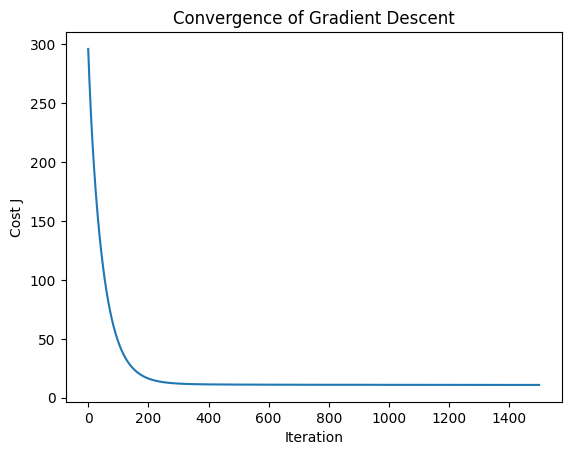

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Convergence of Gradient Descent")
plt.show()


### 6. Make Predictions

* **Training predictions:** To see how well your model learned the training data:








In [14]:
train_preds = [f_wb(x, w_final, b_final) for x in X_train_scaled]

* **Testing predictions:** To see how well your model generalizes to unseen data:

In [15]:
test_preds = [f_wb(x, w_final, b_final) for x in X_test_scaled]

### 7. Evaluate Performance

**Cost / MSE on training data**:

In [16]:
train_cost = compute_cost(X_train_scaled, y_train.to_numpy(), w_final, b_final)
print("Training cost:", train_cost)

Training cost: 10.86855262851841


**Cost / MSE on test data**:

In [17]:
test_cost = compute_cost(X_test_scaled, y_test.to_numpy(), w_final, b_final)
print("Test cost:", test_cost)

Test cost: 12.458722172137886


In [18]:

# Training
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, train_preds)

# Testing
mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, test_preds)

print(f"Train MSE: {mse_train}, R2: {r2_train}")
print(f"Test MSE: {mse_test}, R2: {r2_test}")


Train MSE: 21.737105257036813, R2: 0.7497841192129011
Test MSE: 24.917444344275783, R2: 0.6602187522522731


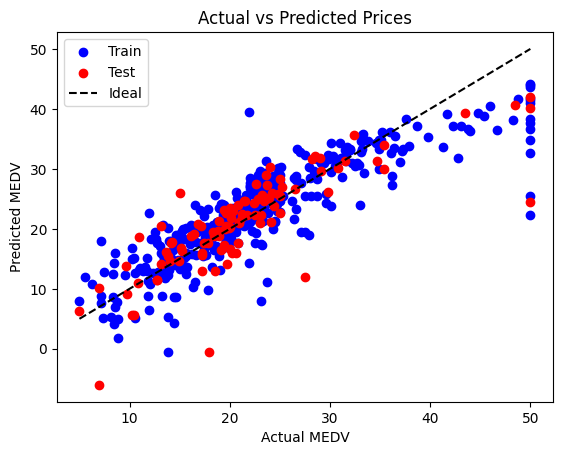

In [19]:
plt.scatter(y_train, train_preds, c='b', label="Train")
plt.scatter(y_test, test_preds, c='r', label="Test")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', label="Ideal")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

## **Linear Regression with scikit-learn**

We will implement linear regression using **scikit-learn**, which handles training and prediction for us.  
The key steps are:

1. **Train the Linear Regression model**

In [20]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


2. **Make predictions** on training and test sets

In [21]:
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

3. **Evaluate performance** using **MSE** and **R²**

In [22]:
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, R²: {train_r2}")
print(f"Test MSE: {test_mse}, R²: {test_r2}")

Train MSE: 21.641412753226312, R²: 0.7508856358979673
Test MSE: 24.291119474973517, R²: 0.668759493535632


4. **Visualize predictions** vs actual values

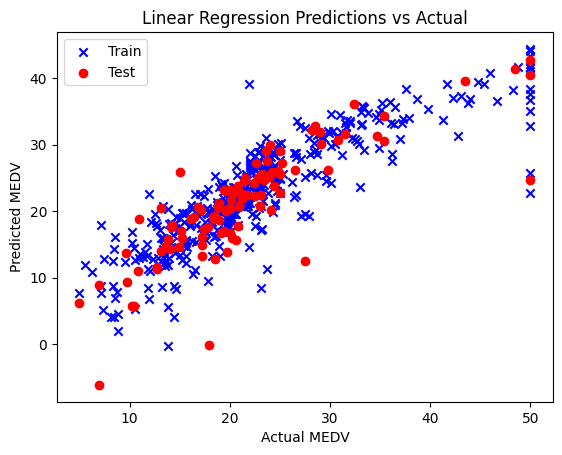

In [23]:
plt.scatter(y_train, y_train_pred, c='blue', marker='x', label='Train')
plt.scatter(y_test, y_test_pred, c='red', marker='o', label='Test')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Linear Regression Predictions vs Actual")
plt.legend()
plt.show()

## **Comparison: Scratch vs scikit-learn Linear Regression**

We will compare the **performance** of our linear regression model implemented from scratch with **scikit-learn’s** implementation.  
Metrics to compare:

- **Mean Squared Error (MSE)**
- **R² score**
- **Predicted vs Actual values visualization**

In [24]:
# Predictions from scratch model
y_train_pred_scratch = [f_wb(x, w_final, b_final) for x in X_train_scaled]
y_test_pred_scratch = [f_wb(x, w_final, b_final) for x in X_test_scaled]

# Predictions from scikit-learn model
y_train_pred_skl = lr_model.predict(X_train_scaled)
y_test_pred_skl = lr_model.predict(X_test_scaled)


metrics = {
    "Scratch": {
        "Train MSE": mean_squared_error(y_train, y_train_pred_scratch),
        "Test MSE": mean_squared_error(y_test, y_test_pred_scratch),
        "Train R2": r2_score(y_train, y_train_pred_scratch),
        "Test R2": r2_score(y_test, y_test_pred_scratch)
    },
    "scikit-learn": {
        "Train MSE": mean_squared_error(y_train, y_train_pred_skl),
        "Test MSE": mean_squared_error(y_test, y_test_pred_skl),
        "Train R2": r2_score(y_train, y_train_pred_skl),
        "Test R2": r2_score(y_test, y_test_pred_skl)
    }
}

pd.DataFrame(metrics)

,Scratch,scikit-learn
Train MSE,21.737105,21.641413
Test MSE,24.917444,24.291119
Train R2,0.749784,0.750886
Test R2,0.660219,0.668759


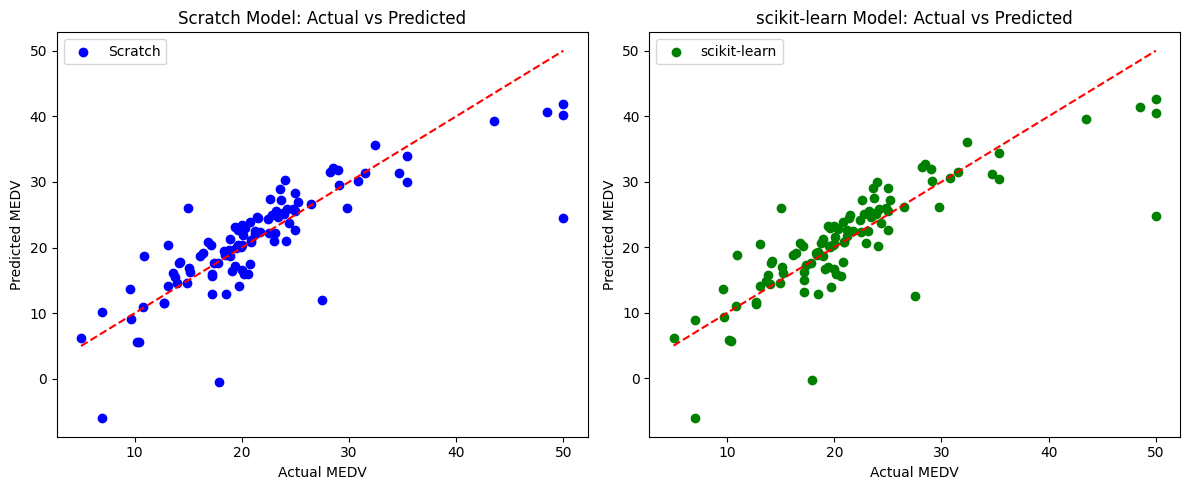

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_test_pred_scratch, c='blue', label='Scratch')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Scratch Model: Actual vs Predicted")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred_skl, c='green', label='scikit-learn')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("scikit-learn Model: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()
